## **Loading the Dataset**

In [ ]:
# Import necessary libraries
import os
import pandas as pd

# Set Kaggle credentials and download dataset
os.environ['KAGGLE_CONFIG_DIR'] = '/content/'

# Download the dataset from Kaggle
!kaggle datasets download -d datafiniti/consumer-reviews-of-amazon-products

# Unzip the downloaded dataset
!unzip consumer-reviews-of-amazon-products.zip

# Dynamically identify the third CSV file in the directory
import glob
csv_files = sorted(glob.glob("*.csv"))  # Sort the files to maintain order
if len(csv_files) < 3:
    raise FileNotFoundError("Less than 3 CSV files are available in the directory.")
file_path = csv_files[2]  # Select the third file

# Load the dataset
data = pd.read_csv(file_path)

Dataset URL: https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products
License(s): CC-BY-NC-SA-4.0
 98% 16.0M/16.3M [00:00<00:00, 72.6MB/s]
100% 16.3M/16.3M [00:00<00:00, 65.5MB/s]
Archive:  consumer-reviews-of-amazon-products.zip
  inflating: 1429_1.csv              
  inflating: Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv  
  inflating: Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv  


## **Exploratory Data Analysis**

In [ ]:
# Display basic info
print(f"Loaded dataset: {file_path}")
print("Dataset Info:")
print(data.info())

Loaded dataset: Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   28332 non-null  object 
 1   dateAdded            28332 non-null  object 
 2   dateUpdated          28332 non-null  object 
 3   name                 28332 non-null  object 
 4   asins                28332 non-null  object 
 5   brand                28332 non-null  object 
 6   categories           28332 non-null  object 
 7   primaryCategories    28332 non-null  object 
 8   imageURLs            28332 non-null  object 
 9   keys                 28332 non-null  object 
 10  manufacturer         28332 non-null  object 
 11  manufacturerNumber   28332 non-null  object 
 12  reviews.date         28332 non-null  object 
 13  reviews.dateSeen     28332 non-null  objec

In [ ]:
# Preview the data
print("First 5 Rows:")
print(data.head())

First 5 Rows:
                     id             dateAdded           dateUpdated  \
0  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
1  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
2  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
3  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
4  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   

                                                name                  asins  \
0  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   
1  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   
2  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   
3  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   
4  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   

          brand                                         categories  \
0  Amazonbasic

In [ ]:
# Focus on relevant column
data = data[['reviews.text']].dropna()
data.rename(columns={'reviews.text': 'text'}, inplace=True)

# Basic statistics
print(f"Number of reviews: {len(data)}")
print("Top 5 most frequent words (raw):")
data['text'].str.split(expand=True).stack().value_counts().head()

Number of reviews: 28332
Top 5 most frequent words (raw):


,count
the,25154
and,21850
I,19762
to,19324
for,17197


## **Data Preprocessing**

### **Cleaning**

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define a cleaning function
def clean_text(text):
    # Lowercase text
    text = text.lower()
    # Remove punctuation, numbers, and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove stopwords and lemmatize
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Apply cleaning
data['cleaned_text'] = data['text'].apply(clean_text)
print("Sample cleaned text:")
print(data['cleaned_text'].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Sample cleaned text:
0    order one item bad quality missing backup spri...
1       bulk always less expensive way go product like
2                            well duracell price happy
3    seem work well name brand battery much better ...
4                     battery long lasting price great
Name: cleaned_text, dtype: object


### **Feature Extraction using TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Convert text to numerical vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(data['cleaned_text'])
print(f"TF-IDF Matrix Shape: {tfidf_matrix.shape}")


TF-IDF Matrix Shape: (28332, 1000)


## **Sentiment Analysis**

### **With Transformers**

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Sentiment Distribution:
sentiment
POSITIVE    18146
NEGATIVE    10186
Name: count, dtype: int64


<ipython-input-7-6a23baca2873>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='sentiment', palette='pastel')


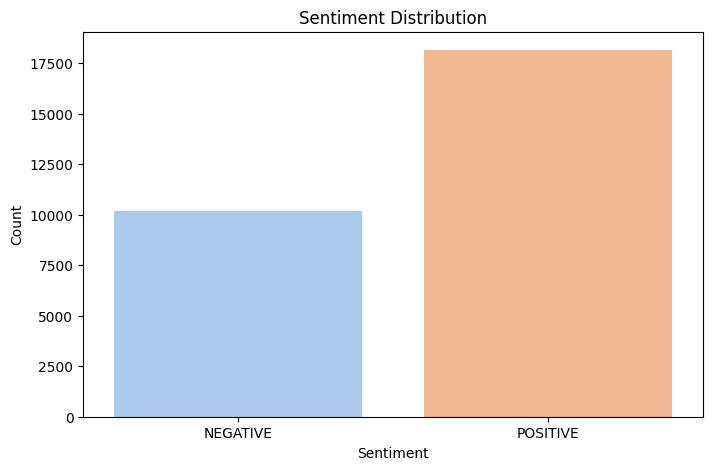

In [ ]:
from transformers import pipeline

# Load sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# Perform sentiment analysis with truncation
data['sentiment'] = data['cleaned_text'].apply(lambda x: sentiment_pipeline(x, truncation=True)[0]['label'])

# Display sentiment distribution
print("Sentiment Distribution:")
print(data['sentiment'].value_counts())

# Visualize sentiment
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='sentiment', palette='pastel')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

### **Without Transformers**

In [ ]:
from textblob import TextBlob

# Define a function to classify sentiment
def classify_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment classification
data['sentiment'] = data['cleaned_text'].apply(classify_sentiment)

# Display sentiment distribution
print("Sentiment Distribution:")
print(data['sentiment'].value_counts())

Sentiment Distribution:
sentiment
positive    23795
neutral      2357
negative     2180
Name: count, dtype: int64


<ipython-input-9-6037dd1d0f15>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='sentiment', palette='pastel')


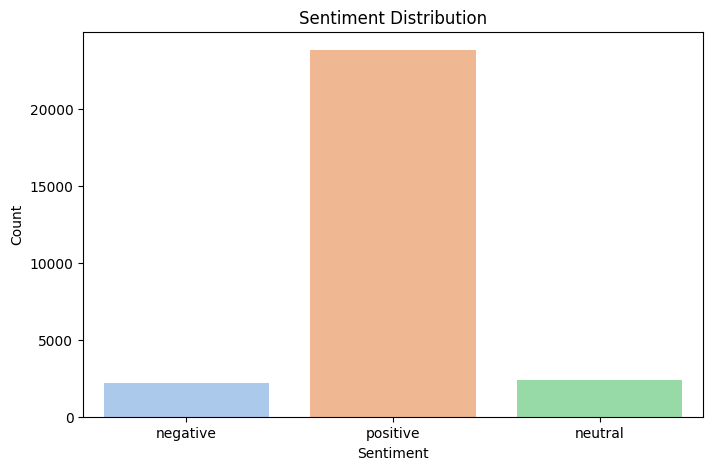

In [ ]:
# Visualize sentiment
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='sentiment', palette='pastel')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [ ]:
# Save the labeled dataset
output_file = "labeled_reviews.csv"
data.to_csv(output_file, index=False)
print(f"Labeled dataset saved as {output_file}")

Labeled dataset saved as labeled_reviews.csv


In [ ]:
# Evaluating Sentiment Analysis Accuracy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prepare data for model training
X = tfidf_matrix
y = data['sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predict sentiments
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the sentiment analysis model: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy of the sentiment analysis model: 0.957649550026469
Classification Report:
              precision    recall  f1-score   support

    negative       0.93      0.69      0.79       429
     neutral       0.93      0.84      0.89       489
    positive       0.96      0.99      0.98      4749

    accuracy                           0.96      5667
   macro avg       0.94      0.84      0.89      5667
weighted avg       0.96      0.96      0.96      5667



## **Text Mining Techniques**

### **Word Frequency Analysis**

Top Keywords by Frequency:
[('battery', 10137), ('great', 9365), ('tablet', 7296), ('good', 5847), ('love', 5733), ('price', 5229), ('use', 4416), ('amazon', 3859), ('work', 3852), ('one', 3179), ('bought', 3174), ('kid', 2979), ('easy', 2903), ('kindle', 2846), ('like', 2665), ('last', 2517), ('long', 2463), ('well', 2437), ('time', 2428), ('product', 2389)]


<ipython-input-12-81c383093f49>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=keywords_df, x='count', y='word', palette='viridis')


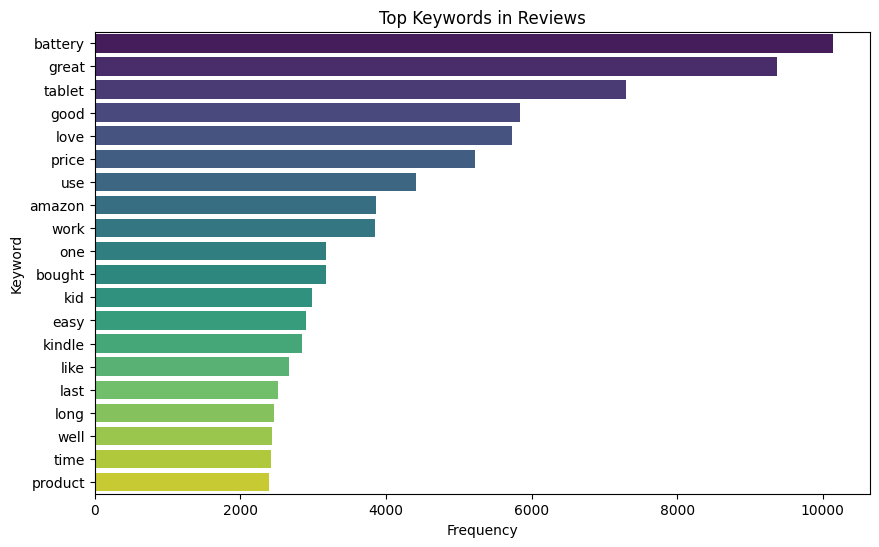

In [ ]:
from collections import Counter

# Split text into words
all_words = ' '.join(data['cleaned_text']).split()

# Count word frequencies
word_freq = Counter(all_words).most_common(20)

# Display top keywords
print("Top Keywords by Frequency:")
print(word_freq)

# Visualize keywords
keywords_df = pd.DataFrame(word_freq, columns=['word', 'count'])
plt.figure(figsize=(10, 6))
sns.barplot(data=keywords_df, x='count', y='word', palette='viridis')
plt.title("Top Keywords in Reviews")
plt.xlabel("Frequency")
plt.ylabel("Keyword")
plt.show()

### **Topic Modeling**

I wanted to experiment both NMF and LDA on this dataset. So,

### **By Applying NMF (Non-Negative Matrix Factorization)**

In [ ]:
from sklearn.decomposition import NMF

# Apply NMF for topic extraction
nmf_model = NMF(n_components=5, random_state=42)
nmf_matrix = nmf_model.fit_transform(tfidf_matrix)

# Display top words for each topic
print("Topics and their keywords:")
for idx, topic in enumerate(nmf_model.components_):
    print(f"Topic {idx + 1}:")
    print([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

Topics and their keywords:
Topic 1:
['fast', 'item', 'tablet', 'quality', 'buy', 'deal', 'value', 'product', 'price', 'great']
Topic 2:
['pretty', 'tablet', 'buy', 'deal', 'product', 'quality', 'far', 'value', 'price', 'good']
Topic 3:
['fire', 'kindle', 'year', 'old', 'bought', 'kid', 'easy', 'use', 'tablet', 'love']
Topic 4:
['price', 'time', 'dont', 'seem', 'amazon', 'name', 'brand', 'long', 'last', 'battery']
Topic 5:
['cheaper', 'far', 'seem', 'name', 'like', 'brand', 'expected', 'fine', 'well', 'work']


### **By Applying LDA (Latent Dirichlet Allocation)**

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# Apply LDA for topic extraction
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_matrix = lda_model.fit_transform(tfidf_matrix)

# Display top words for each topic
print("Topics and their keywords (using LDA):")
for idx, topic in enumerate(lda_model.components_):
    print(f"Topic {idx + 1}:")
    print([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

Topics and their keywords (using LDA):
Topic 1:
['apps', 'bought', 'use', 'great', 'easy', 'year', 'old', 'kid', 'tablet', 'love']
Topic 2:
['great', 'gift', 'use', 'bought', 'one', 'book', 'fire', 'love', 'kindle', 'tablet']
Topic 3:
['buy', 'deal', 'brand', 'last', 'long', 'work', 'price', 'good', 'battery', 'great']
Topic 4:
['sound', 'screen', 'tablet', 'use', 'easy', 'nice', 'product', 'good', 'great', 'value']
Topic 5:
['long', 'good', 'dont', 'excellent', 'used', 'work', 'amazon', 'last', 'expected', 'battery']


## **Clustering**

### **KMeans Clustering**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Apply KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
data['cluster'] = kmeans.fit_predict(tfidf_matrix)

# Evaluate clustering
silhouette_avg = silhouette_score(tfidf_matrix, data['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.01575884393730679


Here, based on the silhouette score i.e. 0.015, we can say that the clusters will be poorly formed. So, let's see the visualization part and then try ways to improve this score for better cluster visualization.

## **Visualization**

### **PCA for Dimensionality Reduction**

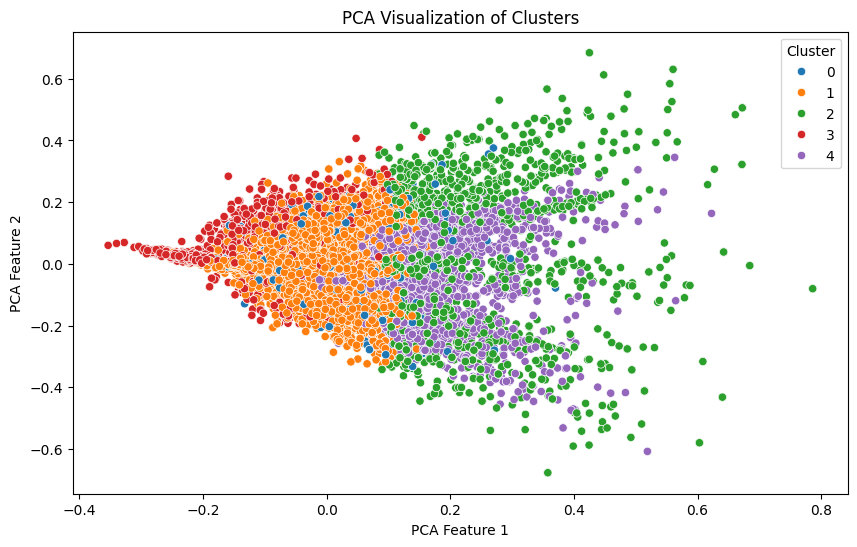

In [ ]:
from sklearn.decomposition import PCA

# Reduce to 2 dimensions for visualization
pca = PCA(n_components=2, random_state=42)
reduced_data = pca.fit_transform(tfidf_matrix.toarray())

# Add PCA results to the dataset
data['x'] = reduced_data[:, 0]
data['y'] = reduced_data[:, 1]

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='x', y='y', hue='cluster', data=data, palette='tab10')
plt.title("PCA Visualization of Clusters")
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.legend(title="Cluster")
plt.show()

As expected, the clusters are poorly formed.

### **Improving Sihouette Score for better cluster visualization**

Improved Silhouette Score after PCA: 0.4764497305629891


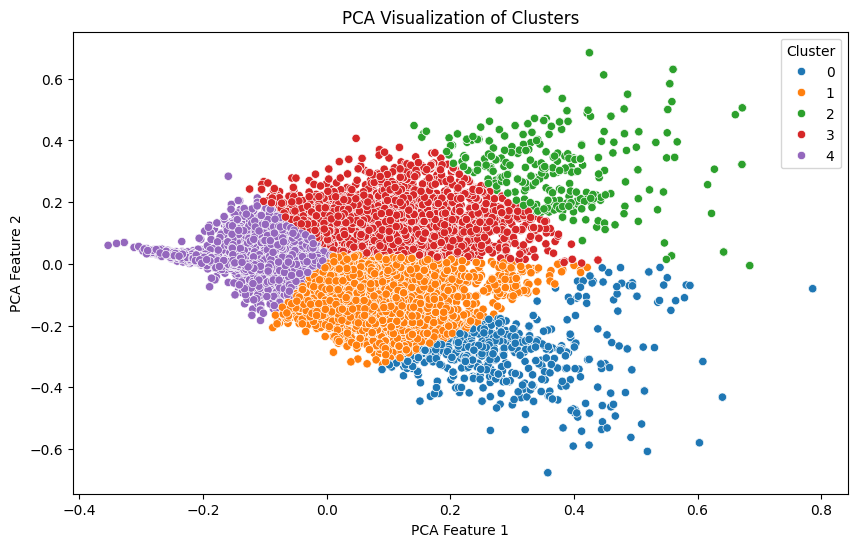

In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensions using PCA for better clustering
pca = PCA(n_components=2, random_state=42)
reduced_data = pca.fit_transform(tfidf_matrix.toarray())

# Apply KMeans to reduced data
kmeans_pca = KMeans(n_clusters=5, random_state=42)
data['cluster_pca'] = kmeans_pca.fit_predict(reduced_data)

# Recalculate silhouette score
silhouette_avg_pca = silhouette_score(reduced_data, data['cluster_pca'])
print(f"Improved Silhouette Score after PCA: {silhouette_avg_pca}")

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=data['cluster_pca'], palette='tab10')
plt.title("PCA Visualization of Clusters")
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.legend(title="Cluster")
plt.show()